<font size="6"><center>📊 Marriage & Divorce Rate Analysis 📈</center></font>

This project is focused on the statistical analysis of the marriage rates and divorce rates of states of US.
The dataset is downloaded from the following link:
https://www.cdc.gov/nchs/nvss/marriage-divorce.htm

In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
import pandas as pd
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Marriage Rates Dataset

In [2]:
# reading the marriage rates dataset
m_df=pd.read_excel('state-marriage-rates-90-95-99-21.xlsx', header=5)
m_df

,Unnamed: 0,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,7.577566,7.168500,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.315232,5.696443,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.422112,4.895841,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.216753,7.776878,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.184868,3.183391,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.388935,6.720711,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.405762,4.254702,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.869522,4.426388,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.305425,6.540257,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2


- We can see that the first row of the dataframe is empty, we have to remove that row. Along with that last 8 rows are also not of any use. Ultimately we're going to remove these rows also.
- We've to change the column name of the first column as it is unnamed.
- There are some empty values filled as '---'. We will convert them into NaN and then fill with median of the particular column.
- The name of the state 'California' is written as 'California 1'. We have to change it as well. 

In [3]:
m_df.drop([0,52,53,54,55,56,57,58,59],axis=0, inplace=True)

m_df.rename(columns={'Unnamed: 0':'state'}, inplace=True)
m_df['state'][5]='California'

m_df=m_df.replace({'---':np.nan}) # replacing the --- by NaN value

m_df.columns = [str(col) for col in m_df.columns]
for year in range(2000,2021):
    m_df[str(year)].fillna(m_df[str(year)].median(), inplace=True)

m_df

,state,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,7.577566,7.168500,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,...,9.2,9.2,9.4,9.6,9.9,9.4,10.10,10.8,9.8,10.6
2,Alaska,6.315232,5.696443,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,...,8.2,8.2,8.5,8.1,8.3,8.1,8.90,8.6,9.0,10.2
3,Arizona,5.422112,4.895841,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,...,6.5,6.6,6.7,6.5,6.7,7.6,7.50,8.2,8.8,10.0
4,Arkansas,8.216753,7.776878,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,...,12.4,12.9,13.4,13.4,14.3,14.3,15.40,14.8,14.4,15.3
5,California,5.184868,3.183391,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,...,6.3,6.4,6.4,6.1,6.2,6.5,5.80,6.4,6.3,7.9
6,Colorado,7.388935,6.720711,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,...,7.2,7.6,7.4,7.8,8.0,8.2,8.30,8.2,9.0,9.8
7,Connecticut,5.405762,4.254702,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,...,5.5,5.8,5.8,5.5,5.7,5.4,5.70,5.8,6.6,7.9
8,Delaware,4.869522,4.426388,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,...,5.9,5.9,6.1,6.0,6.4,6.5,6.50,6.7,7.3,8.4
9,District of Columbia,7.305425,6.540257,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,...,4.0,4.1,5.2,5.1,5.1,6.2,4.90,6.6,6.1,8.2
10,Florida,6.845467,5.749101,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,...,8.6,8.9,9.0,9.0,9.4,9.3,8.90,8.7,9.9,10.9


### Divorce Rates Dataset
Now we will import the divorce rates dataset and repeat the same steps that we did for marriage rates dataset.

In [4]:
#importing marriage rates dataset

d_df=pd.read_excel('state-divorce-rates-90-95-99-21.xlsx', header=5)
d_df

,Unnamed: 0,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,3.605842,3.656179,3.572984,3.714296,3.660498,3.77871,3.85369,3.785022,3.68329,...,4.9,4.9,4.9,5.2,5.4,5.4,5.5,5.7,6,6.1
2,Alaska,3.107798,3.223653,3.638874,3.734551,3.580722,3.946655,4.138499,3.951233,4.461784,...,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5,5,5.5
3,Arizona,2.704665,2.914948,2.915899,2.954273,3.479199,3.352007,3.578466,3.89201,3.92915,...,4,4.2,4.3,4.4,4.8,4,4.6,4.6,6.2,6.9
4,Arkansas,3.618108,3.573642,4.017159,4.066925,3.719694,3.926381,4.842516,4.845318,5.011872,...,5.8,6,6.1,6,6.2,6.2,6.4,6.2,6.3,6.9
5,California,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,4.3
6,Colorado,3.049344,2.904583,3.291,3.2736,3.186287,3.566256,3.725048,3.866602,4.073558,...,4.5,4.4,4.4,4.3,4.7,4.7,4.7,4.8,---,5.5
7,Connecticut,2.478369,1.556927,2.690386,2.853612,2.870533,3.168503,3.128197,2.577657,2.761618,...,3.1,3,3.1,3.2,3.3,3.2,3.3,3,2.9,3.2
8,Delaware,2.554356,2.304397,2.915491,2.800952,2.964845,3.079622,3.093239,3.256685,3.383206,...,3.8,3.8,3.7,3.9,3.5,3.9,3.9,4.5,5,4.4
9,District of Columbia,2.593836,2.058035,2.422958,2.521158,2.477045,2.739404,2.832372,2.57705,2.838584,...,2.1,2,1.8,2,2.4,2.9,3.2,3.6,3.2,4.5


- We can see that the first row of the dataframe is empty, we have to remove that row. Along with that last 8 rows are also not of any use. Ultimately we're going to remove these rows also.
- We've to change the column name of the first column as it is unnamed.
- There are some empty values filled as '---'. We will convert them into NaN and then fill with median of the particular column.

In [5]:
d_df.drop([0,52,53,54,55,56,57,58],axis=0, inplace=True)

d_df.rename(columns={'Unnamed: 0':'state'}, inplace=True)

d_df=m_df.replace({'---':np.nan}) # replacing the --- by NaN value

d_df.columns = [str(col) for col in d_df.columns]
for year in range(2000,2021):
    d_df[str(year)].fillna(d_df[str(year)].median(), inplace=True)

d_df

,state,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,7.577566,7.168500,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,...,9.2,9.2,9.4,9.6,9.9,9.4,10.10,10.8,9.8,10.6
2,Alaska,6.315232,5.696443,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,...,8.2,8.2,8.5,8.1,8.3,8.1,8.90,8.6,9.0,10.2
3,Arizona,5.422112,4.895841,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,...,6.5,6.6,6.7,6.5,6.7,7.6,7.50,8.2,8.8,10.0
4,Arkansas,8.216753,7.776878,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,...,12.4,12.9,13.4,13.4,14.3,14.3,15.40,14.8,14.4,15.3
5,California,5.184868,3.183391,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,...,6.3,6.4,6.4,6.1,6.2,6.5,5.80,6.4,6.3,7.9
6,Colorado,7.388935,6.720711,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,...,7.2,7.6,7.4,7.8,8.0,8.2,8.30,8.2,9.0,9.8
7,Connecticut,5.405762,4.254702,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,...,5.5,5.8,5.8,5.5,5.7,5.4,5.70,5.8,6.6,7.9
8,Delaware,4.869522,4.426388,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,...,5.9,5.9,6.1,6.0,6.4,6.5,6.50,6.7,7.3,8.4
9,District of Columbia,7.305425,6.540257,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,...,4.0,4.1,5.2,5.1,5.1,6.2,4.90,6.6,6.1,8.2
10,Florida,6.845467,5.749101,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,...,8.6,8.9,9.0,9.0,9.4,9.3,8.90,8.7,9.9,10.9


## Describing the Data (Descriptive Statistics)

In [6]:
numeric_cols = m_df.select_dtypes(include=['number'])

# Use the describe function to get statistics
statistics = numeric_cols.describe().transpose()
statistics['kurt'] = numeric_cols.apply(stats.kurtosis)
statistics['skew'] = numeric_cols.apply(stats.skew)

# Print the desired statistics
print(statistics[['mean', '50%', 'std','kurt','skew']])

           mean       50%        std       kurt      skew
2021   6.650678  5.931347   3.189655  26.207825  4.812584
2020   5.768062  5.304309   2.562566  22.973455  4.328550
2019   6.690790  6.038471   3.104246  27.593178  5.029479
2018   7.018220  6.391479   3.199434  27.340271  5.039844
2017   7.313672  6.767399   3.386213  29.261233  5.227871
2016   7.426306  6.851633   3.367150  28.382695  5.134118
2015   7.467660  6.856525   3.720305  30.325713  5.336090
2014   7.684381  6.892587   3.931420  27.031475  5.019795
2013   7.522335  6.769738   3.936938  29.438534  5.225773
2012   7.527451  6.800000   4.354771  30.368158  5.348061
2011   7.615686  6.800000   4.595231  31.121006  5.405730
2010   7.619608  6.800000   4.782929  31.943395  5.490994
2009   7.535294  6.600000   5.049706  33.447057  5.635508
2008   7.784314  6.800000   5.382801  31.905982  5.482480
2007   8.182353  7.000000   6.242586  33.201875  5.629394
2006   8.405882  7.100000   6.722631  33.749264  5.691414
2005   8.68431

In [7]:
stats.kurtosis(m_df['2021'])

26.207824874766285

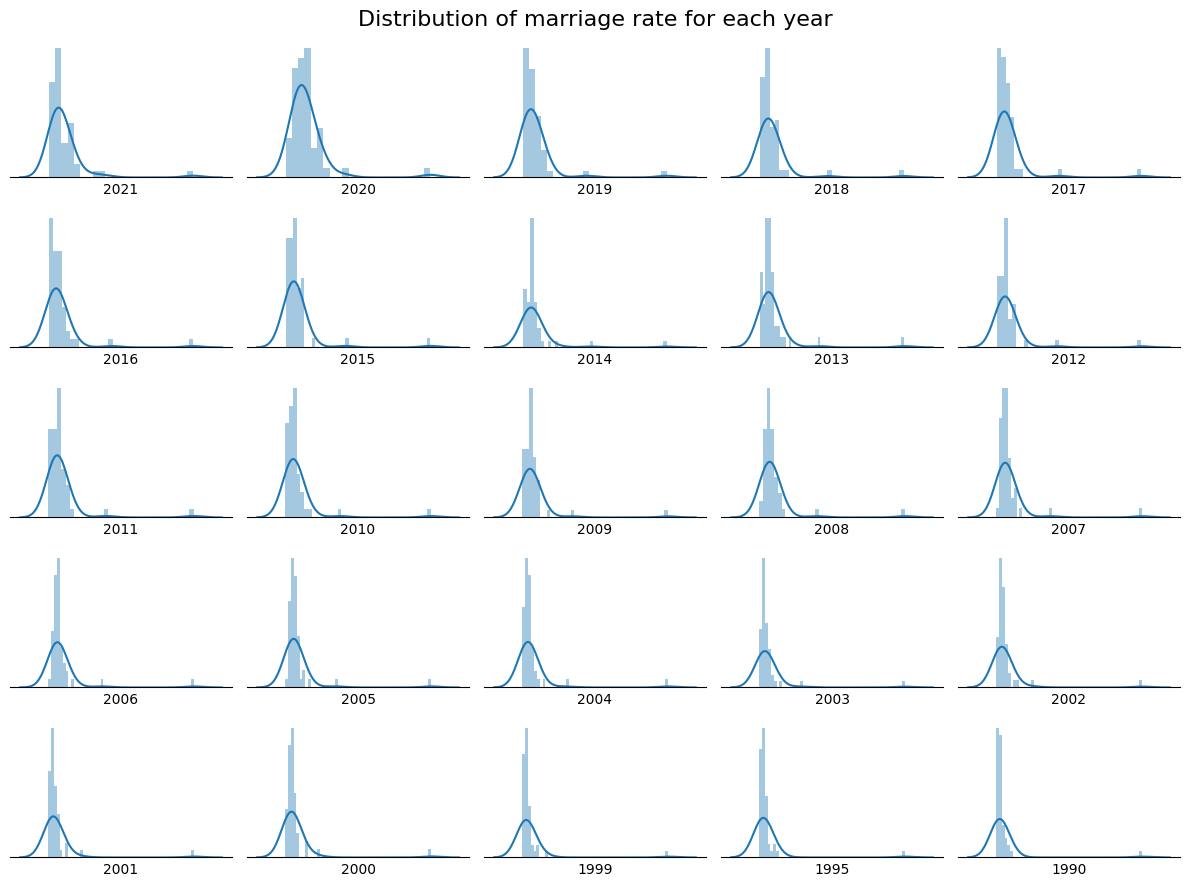

In [59]:
#Distribution of the marriage rates in each year

numeric_col_names = m_df.select_dtypes(include=['number']).columns

rows,cols=5,5
fig,ax=plt.subplots(rows,cols,figsize=(12,9))
iteration=0
for row in range(0,rows):
    for col in range(0,cols):
        sns.distplot(m_df[numeric_col_names[iteration]],ax=ax[row,col])
        ax[row,col].get_yaxis().set_visible(False)
        ax[row,col].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
        ax[row,col].spines['top'].set_visible(False)  # Remove top spine
        ax[row,col].spines['right'].set_visible(False)
        ax[row,col].spines['left'].set_visible(False)
        iteration+=1

plt.suptitle('Distribution of marriage rate for each year', fontsize=16)
plt.tight_layout()
plt.show()

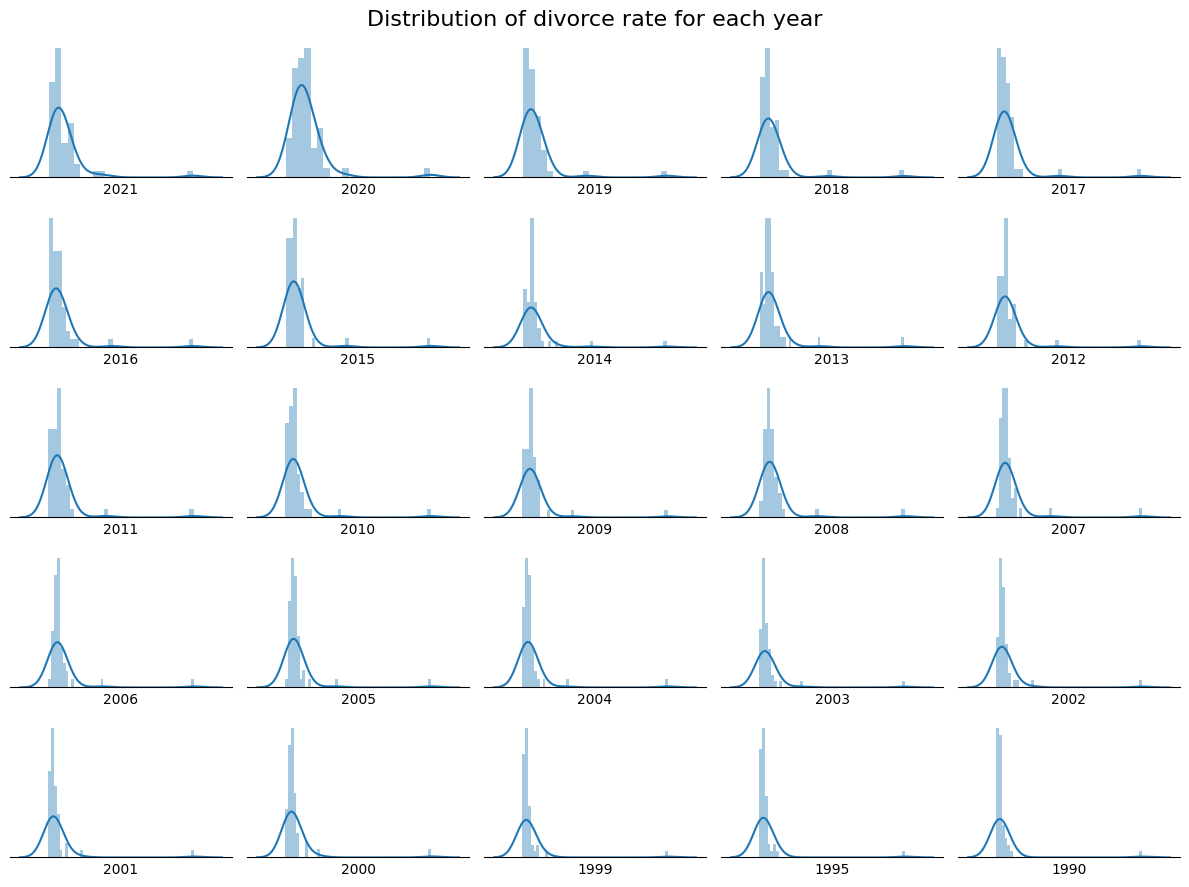

In [60]:
#Distribution of the divorce rates in each year

numeric_col_names = d_df.select_dtypes(include=['number']).columns

rows,cols=5,5
fig,ax=plt.subplots(rows,cols,figsize=(12,9))
iteration=0
for row in range(0,rows):
    for col in range(0,cols):
        sns.distplot(d_df[numeric_col_names[iteration]],ax=ax[row,col])
        ax[row,col].get_yaxis().set_visible(False)
        ax[row,col].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
        ax[row,col].spines['top'].set_visible(False)  # Remove top spine
        ax[row,col].spines['right'].set_visible(False)
        ax[row,col].spines['left'].set_visible(False)
        iteration+=1

plt.suptitle('Distribution of divorce rate for each year', fontsize=16)
plt.tight_layout()
plt.show()

In [69]:
t_m_df=m_df.T
t_m_df.columns=t_m_df.iloc[0]
t_m_df=t_m_df.iloc[1:].reset_index(drop=True)
t_m_df


state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,7.577566,6.315232,5.422112,8.216753,5.184868,7.388935,5.405762,4.869522,7.305425,6.845467,...,6.266641,7.602916,5.773718,9.08455,7.379525,5.908052,5.479608,6.041081,5.023145,7.392844
1,7.1685,5.696443,4.895841,7.776878,3.183391,6.720711,4.254702,4.426388,6.540257,5.749101,...,6.003022,7.342561,5.341994,8.434468,6.004681,5.304309,4.823352,5.619158,4.541328,6.841505
2,6.697687,6.512245,5.302995,8.377284,5.723191,7.273297,5.048401,4.951919,7.773302,7.070065,...,6.144741,7.488753,4.867898,8.058122,7.726098,6.128508,5.74926,5.978862,5.03724,7.008098
3,6.760408,6.683952,5.534434,8.863156,6.035132,7.585728,5.278133,5.237957,7.835377,7.332063,...,6.535674,7.951096,6.121488,8.355306,7.94349,6.398452,6.023947,6.06701,5.430056,7.051652
4,7.04734,6.914078,5.834867,9.456845,6.27825,7.333845,5.553784,5.528417,8.239526,7.806895,...,6.742819,8.234385,7.096127,8.72065,7.908193,6.783573,6.246909,6.31162,5.634561,7.125657
5,7.147821,7.103441,5.930541,9.860962,6.46359,7.425443,5.617858,5.613062,8.149214,8.125967,...,7.247063,8.614092,7.077625,8.990183,8.299792,6.988628,6.235593,6.354097,5.616134,7.079407
6,7.351544,7.407588,5.922469,10.040279,6.184957,6.791807,5.292009,5.712872,8.220425,8.234362,...,7.214005,8.502342,7.214466,8.075986,8.124056,6.980323,6.219361,6.574923,5.611351,7.341663
7,7.806776,7.508836,5.780449,10.112026,6.441492,7.061603,5.368845,6.022783,11.821343,7.301404,...,7.073578,8.409229,6.851589,7.317947,8.698261,6.744421,6.956141,6.669095,5.691296,7.658952
8,7.817785,7.293928,5.401091,9.751052,6.460467,6.452664,5.021023,6.571976,10.791261,7.009614,...,7.005754,8.447843,6.976356,7.503606,9.155323,6.657785,7.11033,6.644002,5.219136,7.549883
9,8.2,7.2,5.6,10.9,6.0,6.8,5.2,5.8,8.4,7.2,...,7.5,8.8,7.3,8.4,8.2,6.8,6.3,7.0,5.4,7.6


### Visualization

In [10]:
# extracting the years, names of the states for both datasets
yearM = m_df.columns[1:].to_numpy().astype(float)
statesM = m_df.iloc[:,0]
M=m_df.iloc[:,1:]
yearD= d_df.columns[1:].to_numpy().astype(float)
statesD=d_df.iloc[:,0]
D=d_df.iloc[:,1:]

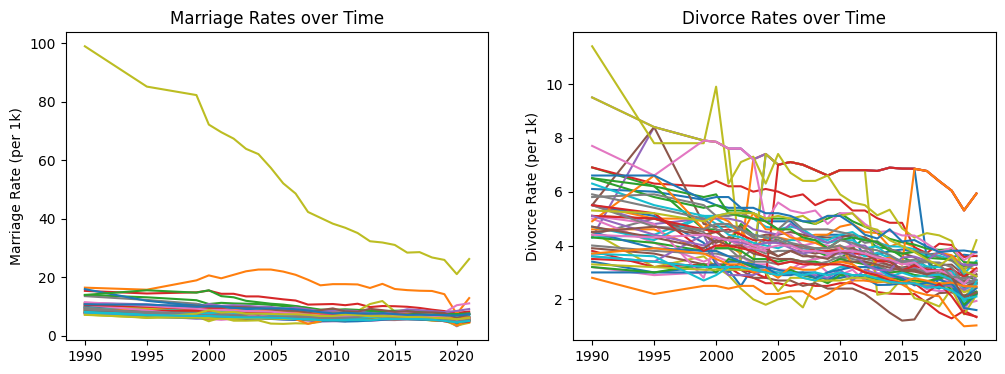

In [11]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

#marriage rates
ax[0].plot(yearM,M.T)
ax[0].set_ylabel('Marriage Rate (per 1k)')
ax[0].set_title('Marriage Rates over Time')

#divorce rates
ax[1].plot(yearD,D.T)
ax[1].set_ylabel('Divorce Rate (per 1k)')
ax[1].set_title('Divorce Rates over Time')

plt.show()

We can see that one state has huge marriage rate because of which we are not able to draw any conclusion about the trend of marriage rate over time. So we are going to z-normalise the data then analyse the trend of marriage rates over time.

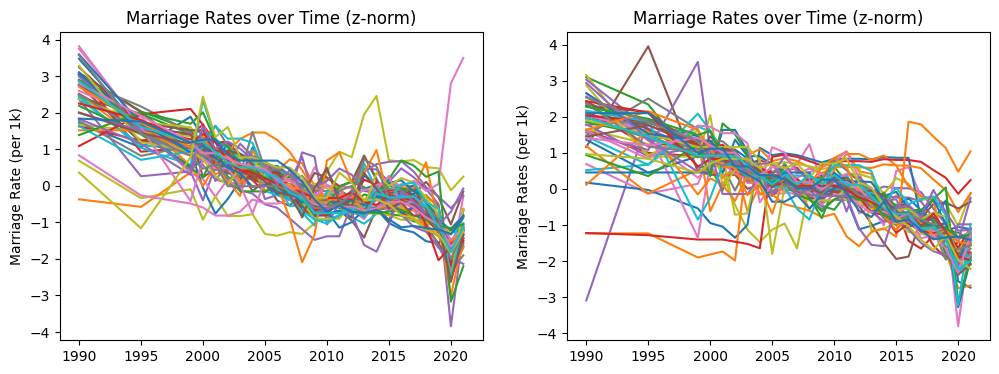

In [12]:
fig,ax= plt.subplots(1,2,figsize=(12,4))

#marriage dataset
ax[0].plot(yearM,stats.zscore(M.T))
ax[0].set_ylabel('Marriage Rate (per 1k)')
ax[0].set_title('Marriage Rates over Time (z-norm)')

#divorce dataset
ax[1].plot(yearD,stats.zscore(D.T))
ax[1].set_ylabel('Marriage Rates (per 1k)')
ax[1].set_title('Marriage Rates over Time (z-norm)')

plt.show()

- The marriage rate tends to decrease over time in almost each state. There are few states where it's quite different.



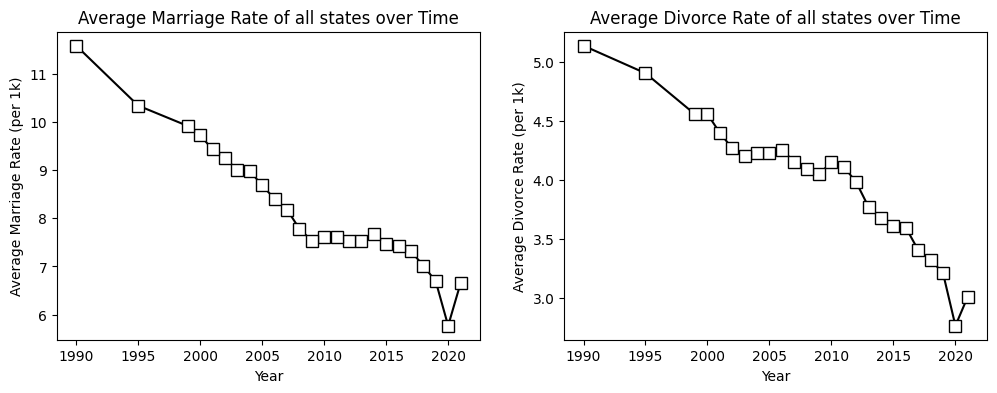

In [13]:
# average of the marriage rate & divorce rate of all states over time
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(yearM, np.mean(M, axis=0), 'ks-', markerfacecolor='w', markersize=8)
ax[0].set_ylabel('Average Marriage Rate (per 1k)')
ax[0].set_title('Average Marriage Rate of all states over Time')
ax[0].set_xlabel('Year')

ax[1].plot(yearD, np.mean(D, axis=0), 'ks-', markerfacecolor='w', markersize=8)
ax[1].set_ylabel('Average Divorce Rate (per 1k)')
ax[1].set_title('Average Divorce Rate of all states over Time')
ax[1].set_xlabel('Year')

plt.show()

- The overall marriage rate and divorce rate of the country is decreasing over time.
- Because of unavailability of data of the year between 1990 and 1995, we can see that there isn't any marker in the plot. Similarly for the next few years of 1995.
- In 2020, we have a big fall in both rates and in 2021, both rates again increases back to predicted. This can be becasue of the Covid-19 pandemic which was on surge in the year 2020.

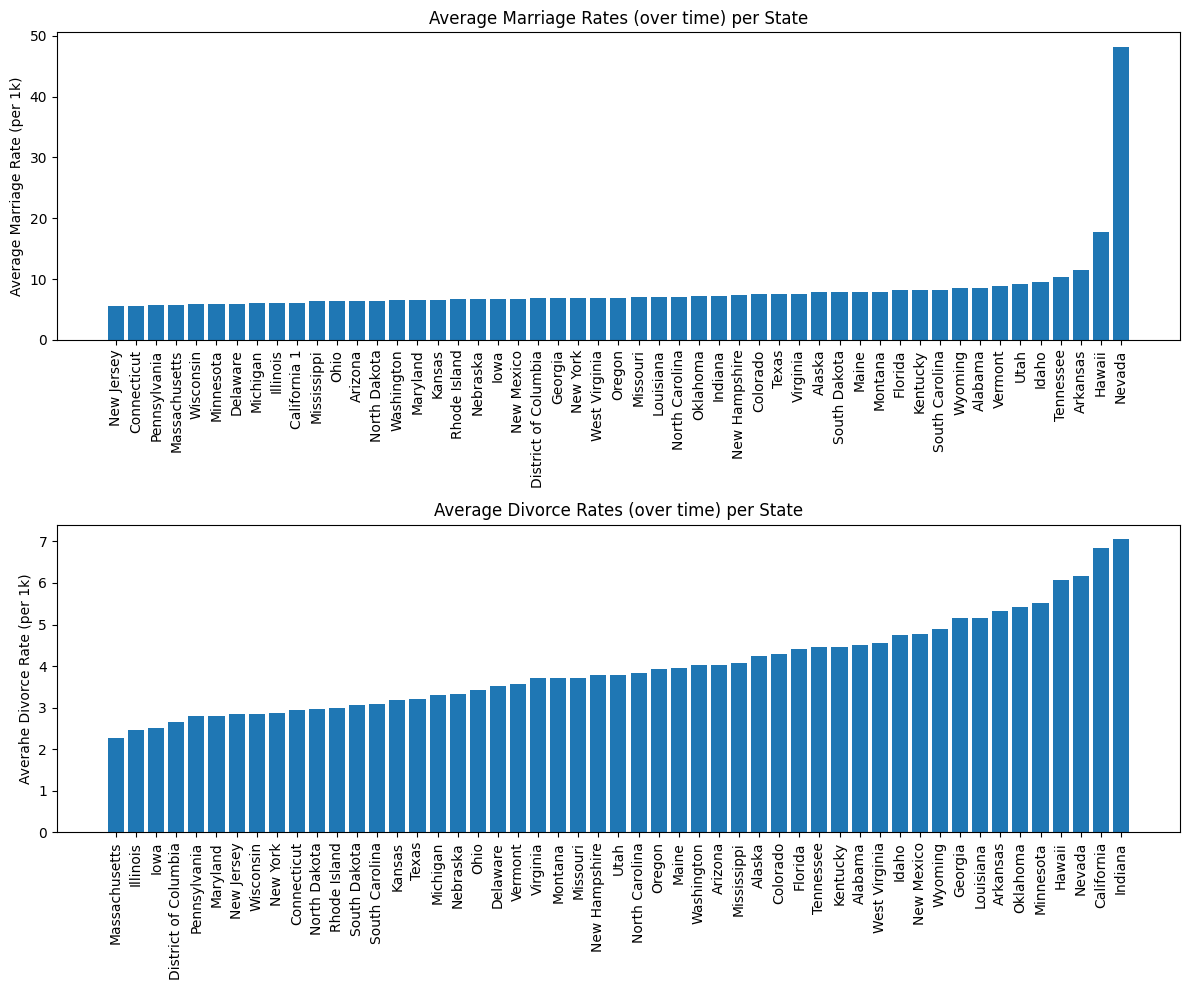

In [14]:
# calculating mean marriage rate and mean divorce rate of each state over time.
meanMrgRate=np.mean(M, axis=1)
meanDrcRate=np.mean(D, axis=1)

# creating new dfs of states and mean marriage rate, similarly for divorce rates
meanMrgRatePlt=pd.concat([pd.DataFrame(statesM)['state'],pd.DataFrame(meanMrgRate)[0]],axis=1)
meanMrgRatePlt.rename(columns={0:'mrg_rate'},inplace=True)
meanMrgRatePlt.sort_values('mrg_rate',ascending=True, inplace=True) # sorting values in ascending order

meanDrcRatePlt=pd.concat([pd.DataFrame(statesD)['state'],pd.DataFrame(meanDrcRate)[0]],axis=1)
meanDrcRatePlt.rename(columns={0:'drc_rate'},inplace=True)
meanDrcRatePlt.sort_values('drc_rate',ascending=True,inplace=True) # sorting values by average divorce rate in ascending order.

# plotting the bar plot for both rates
fig,ax=plt.subplots(2,1,figsize=(12,10))

ax[0].bar(meanMrgRatePlt['state'],meanMrgRatePlt['mrg_rate'])
ax[0].set_ylabel('Average Marriage Rate (per 1k)')
ax[0].set_title('Average Marriage Rates (over time) per State')

ax[1].bar(meanDrcRatePlt['state'],meanDrcRatePlt['drc_rate'])
ax[1].set_ylabel('Averahe Divorce Rate (per 1k)')
ax[1].set_title('Average Divorce Rates (over time) per State')

# rotating the axes of both the plots by 90 degrees
for a in ax.flatten():
    plt.sca(a)
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()


- Here rises a question: Is Nevada a non-representative data point or a data error in case of Marriage Rates?<br>
After going through few google searches, I concluded that it is not a data error, it is just a non-representative data point. However, in case of divorce rates it isn't a non-representative data point.

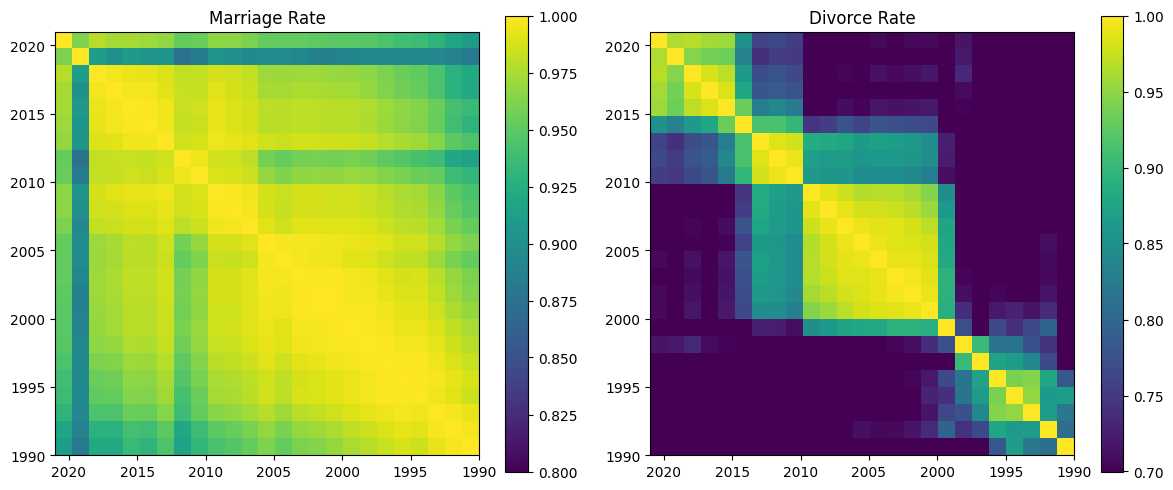

In [15]:
# the correlation matrix

fig,ax=plt.subplots(1,2,figsize=(12,5))

im1=ax[0].imshow(np.corrcoef(M.T),vmin=0.8,vmax=1, extent=[yearM[0],yearM[-1],yearM[-1],yearM[0]])
im2=ax[1].imshow(np.corrcoef(D.T), vmin=0.7, vmax=1, extent=[yearD[0],yearD[-1],yearD[-1],yearD[0]])

plt.colorbar(im1, ax=ax[0])
plt.colorbar(im2, ax=ax[1])

ax[0].set_title('Marriage Rate')
ax[1].set_title('Divorce Rate')

plt.tight_layout()
plt.show()

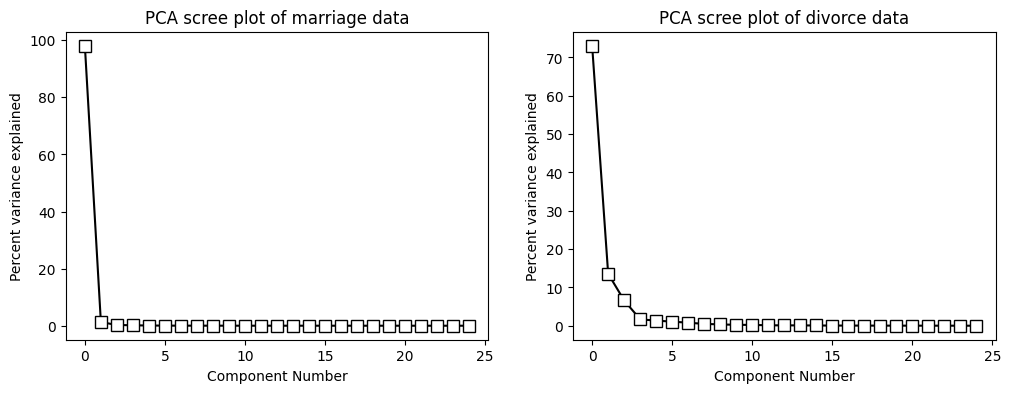

[98.08764719  1.26070063] [73.07246065 13.57315104]


In [16]:
# PCA

pca1 = PCA().fit(M)
pca2 = PCA().fit(D)

# scree plots
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(100*pca1.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=8)
ax[0].set_ylabel('Percent variance explained')
ax[0].set_xlabel('Component Number')
ax[0].set_title('PCA scree plot of marriage data')

ax[1].plot(100*pca2.explained_variance_ratio_,'ks-',markerfacecolor='w', markersize=8)
ax[1].set_ylabel('Percent variance explained')
ax[1].set_xlabel('Component Number')
ax[1].set_title('PCA scree plot of divorce data')

plt.show()

# printing the % of variance explained by the top 2 components
print(100*pca1.explained_variance_ratio_[0:2],100*pca2.explained_variance_ratio_[0:2])

**Marriage Rate**
- The first component accounts for 98 % of the total variance. Basically the entire dataset can be captured as one feature, and that one data feature is the general decrease of marriage rate over time.

**Divorce Rate**
- The first component accounts for 73% of the total variance. The second component accounts for 13% of the total variance.

In [17]:
# checking if marriage and divorce datasets have the same year order
print(np.sum(abs(yearM-yearD)))

0.0


The sum came out to be zero, which means the order of years is same for both datasets.

In [18]:
# checking if marriage and divorce datasets have the same sates order
print(statesM.equals(statesD))

False


We got `False` which means there is some difference, let's check it out!

In [19]:
tmpStates=pd.concat([statesD,statesM], axis=1)
tmpStates

,state,state
1,Alabama,Alabama
2,Alaska,Alaska
3,Arizona,Arizona
4,Arkansas,Arkansas
5,California,California 1
6,Colorado,Colorado
7,Connecticut,Connecticut
8,Delaware,Delaware
9,District of Columbia,District of Columbia
10,Florida,Florida


In [20]:
np.where(tmpStates.iloc[:,0] != tmpStates.iloc[:,1])

(array([4], dtype=int64),)

We can see that we have issue at the 5th row. The difference is becasue of a human error, it's `California 1` instead of `California`. Which is not a big issue. We don't have to worry about that. 

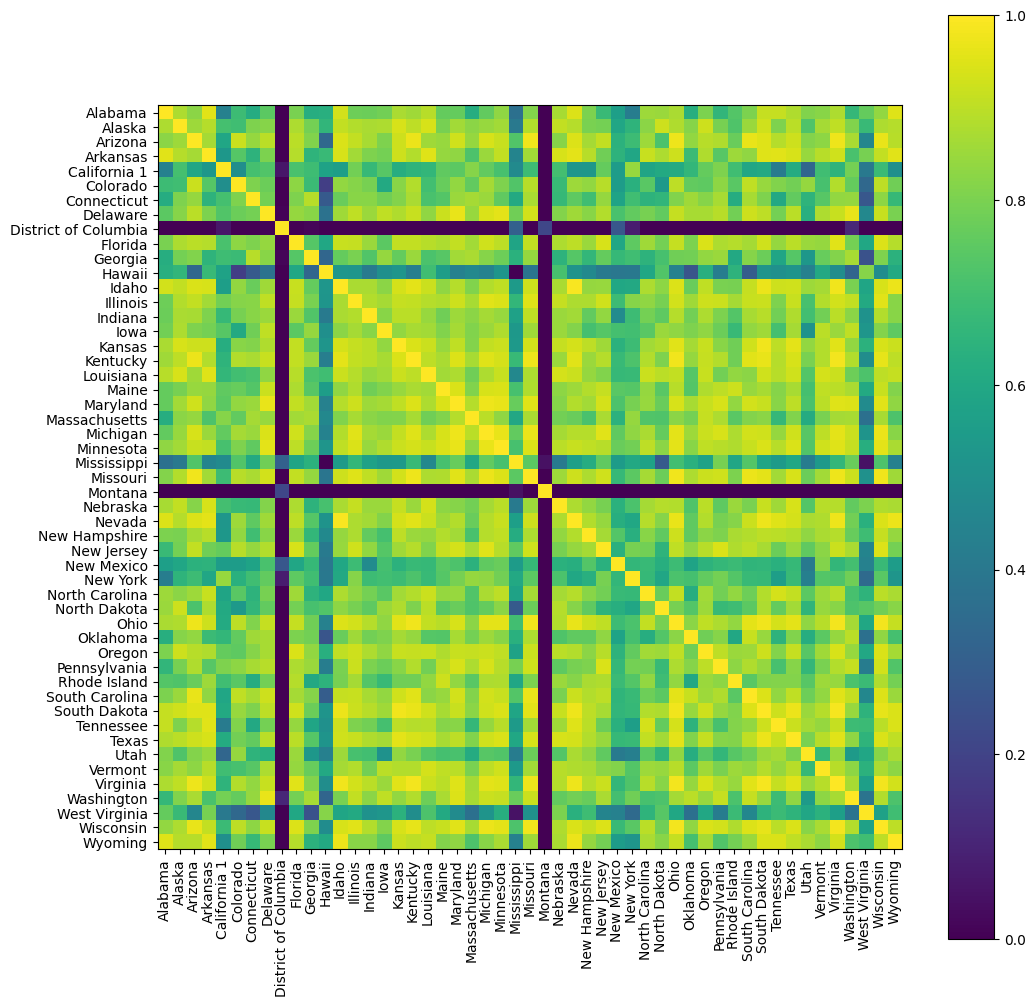

In [21]:
# correlating over states instead of years

fig = plt.figure(figsize=(12,12))
plt.imshow(np.corrcoef(M),vmin=0,vmax=1)
plt.xticks(ticks=range(len(statesM)),labels=statesM,rotation=90)
plt.yticks(ticks=range(len(statesM)),labels=statesM)
plt.colorbar()
plt.show()

💡It is pretty interesting to see that many state pairs are strongly correlated and their marriage rates over time. But there are also some state pairs that are uncorrelated or weakly correlated. The main reason behind this can be of the geography of the states. The adjacent states may have pretty good correlation. 

## Inferential Statistics

In [22]:
range(1,len(statesD))

range(1, 51)

Our intuition is that the marriage rate and divorce rate both are strongly and significantly correlated, which we can see from the plot we did earlier. However, we will test our hypothesis using Pearson correlation coefficient. Particularly we will test the correlation of both rates over time per state.

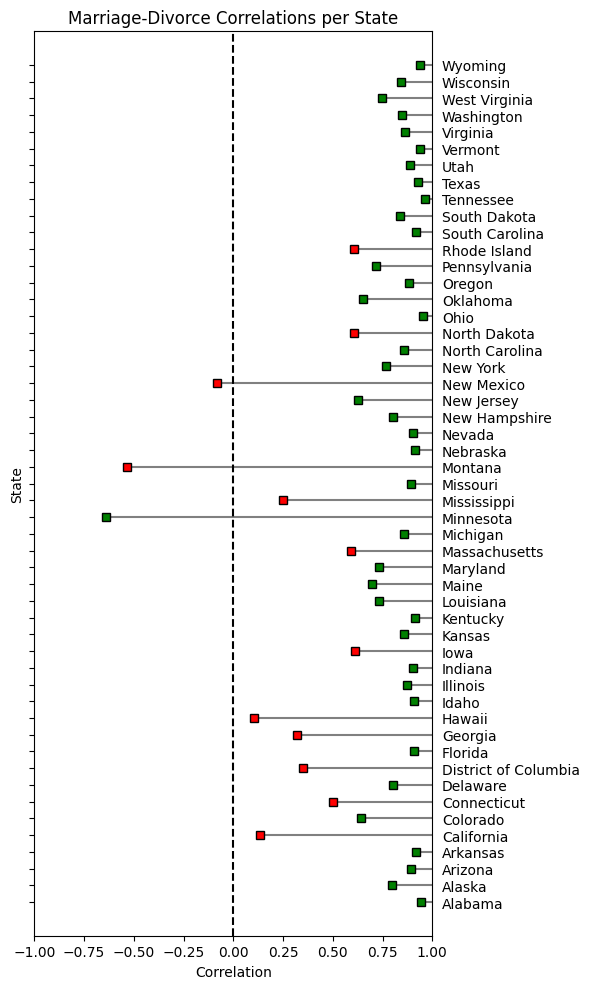

In [23]:
# correlation of M and D over time per state

# Bonferroni corrected threshold
pvalThresh=0.05/51
plt.figure(figsize=(6,10))

color= 'rg'
for s in range(1,len(statesM)+1):
    #computing correlation
    r,p=stats.pearsonr(M.loc[s],D.loc[s])
    # plotting the datapoint in the plot
    plt.plot([r,1],[s,s],'-',color=[.5,.5,.5]) #line
    plt.plot(r,s,'ks',markerfacecolor=color[bool(p<pvalThresh)]) #color dependent point

plt.ylabel('State')
plt.xlabel('Correlation')
plt.title('Marriage-Divorce Correlations per State')
plt.yticks(range(1,len(statesM)+1),labels=statesD)
plt.tick_params(axis='y',which='both',labelleft=False,labelright=True)
plt.xlim([-1,1])
plt.ylim([-1,53])
plt.plot([0,0],[-1,53],'k--')
plt.tight_layout()
plt.show()

**Observations:**
- Our intuition was that the marriage and divorce rates would be strongly significantly correlated. As when we have more people getting married, then we're also going to have more people getting divorced and conversely. Similarly when we have less people getting married, then we're also going to have less people gettings divorced. So strong, positive, significant corelations seems to be sensible. 
- But we can see that there are few states having negative correlation, and feww having nearly zero correlation. So in `New Mexico`, `Hawaii` and `California`, there is basically no relation between marriage rate and divorce rate over time.
- In `Minnesota` we're having a significant negative correlation which is quite surprising. 

**Why Bonferroni corrected threshold?**<br>
This corrected p value threshold is actually a little bit conservative because Bonfesrroni assumes that all of our tests are independent, that they are statistically independent of each other. But that's obviously not the case here, as we saw earlier in the correlation matrix that in neighbouring states, both rates are not independent. It's not resonable to expect that both rates in one state are totally independent of both rates in the neighbouring state. So to be on the safe side, Bonferroni thresold gives us a conservative threshold.

❓Now arises one question **`whether the marriage rate and divorce rates in each state actually declined?`** Because from the plot earlier, we saw a general trend that both rates decline over the time. Let's verify for each state using inferential statistics....

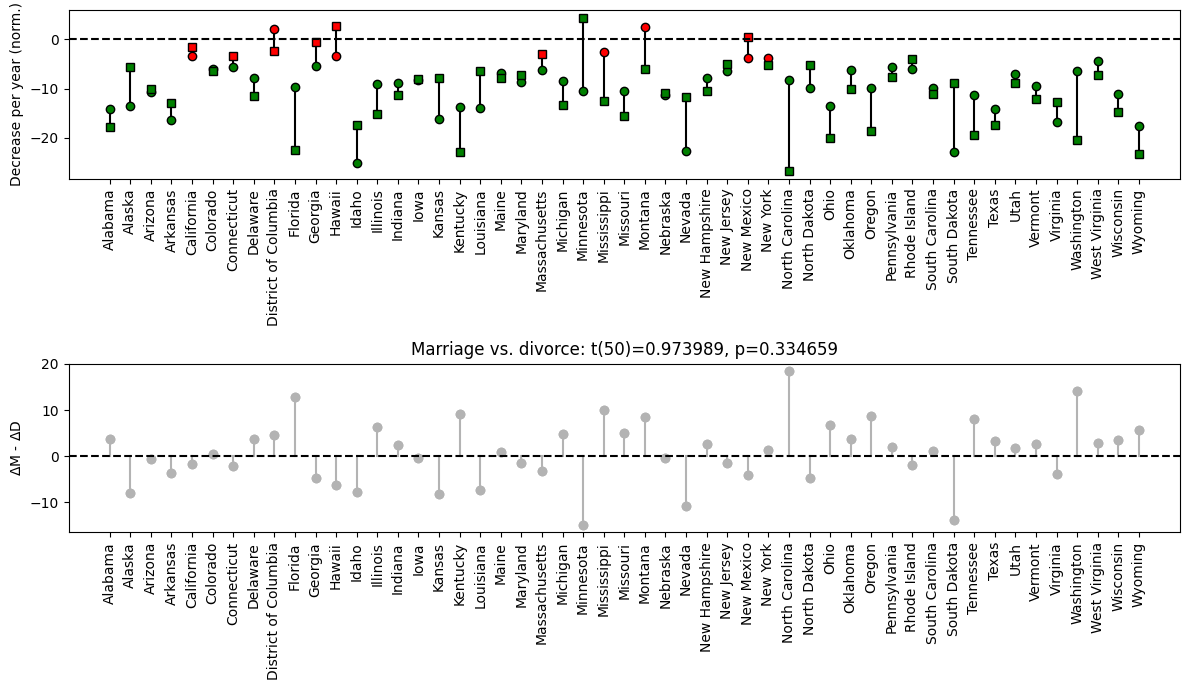

In [24]:
# running linear regression to get the slopes of the trend line for each state and also for both rates.
fig, ax = plt.subplots(2,1,figsize=(12,7))

# initialize slope differences vector
MvsD = np.zeros(len(statesM)+1)

for rowi in range(1,len(statesM)+1):
    
    # running regression (includes the intercept!)
    bM,intercept,r,pM,seM = stats.linregress(yearM,M.loc[rowi]) #slope, intercept, Pearson R value, p value, standard error
    bD,intercept,r,pD,seD = stats.linregress(yearM,D.loc[rowi])
    
    # normalizing beta coefficients
    bM = bM / seM
    bD = bD / seD
    
    # plot the slope values
    ax[0].plot([rowi,rowi],[bM,bD],'k')
    ax[0].plot(rowi,bM,'ko',markerfacecolor=color[bool(pM<pvalThresh)])
    ax[0].plot(rowi,bD,'ks',markerfacecolor=color[bool(pD<pvalThresh)])
    
    # plot the slope differences
    ax[1].plot([rowi,rowi],[bM-bD, 0],'k-',color=[.7,.7,.7])
    ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'ko',color=[.7,.7,.7])
    
    # store the slope differences for subsequent t-test
    MvsD[rowi] = bM-bD


# make the plot look nicer
for i in range(2):
    ax[i].set_xticks(range(1,52))
    ax[i].set_xticklabels(statesD,rotation=90)
    ax[i].set_xlim([-1,53])
    ax[i].plot([-1,53],[0,0],'k--')

ax[0].set_ylabel('Decrease per year (norm.)')
ax[1].set_ylabel('$\Delta$M - $\Delta$D')


### ttest on whether the M-vs-D rates are really different
t,p = stats.ttest_1samp(MvsD,0)
df = len(MvsD)-2

# set the title
ax[1].set_title('Marriage vs. divorce: t(%g)=%g, p=%g'%(df,t,p))
plt.tight_layout()
plt.show()

**Observations**
- The state `Minnesota` has a significant positive slope for the divorce rate, which is little surprising to the overall country trend.
- For most states we have significant decrease in both marriage and divorce rates.

- The second plot actually tells us whether the rate of decline in marriages and divoirces are same. 
- Any state that has a positive values or positive slope differences means that the divorce rate is declining faster. 
- To test the significance of difference, I ran the 1-sample t-test against zero. It is statistically significant with degree of freedom of 50. So for the last 30 yrs, fewer people are gettings married but even fewer people are gettings divorced.